# Iris Flower Classification

<img src='images/iris-flower.webp'>

Iris Flower Classification is one of the most popular case studies among the data science community. Almost every data science newbie has solved this case study once in their life. Here, you are given the measurements associated with each species of iris flower and based on this data, you have to train a machine learning model for the task of classifying iris flowers. So if you are new to machine learning and have never tried to solve this case study, this project is for you. In this project, I will walk you through Iris Flower Classification with machine learning using Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 100)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
62,6.0,2.2,4.0,1.0,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualization

In [9]:
# pip install -U kaleido

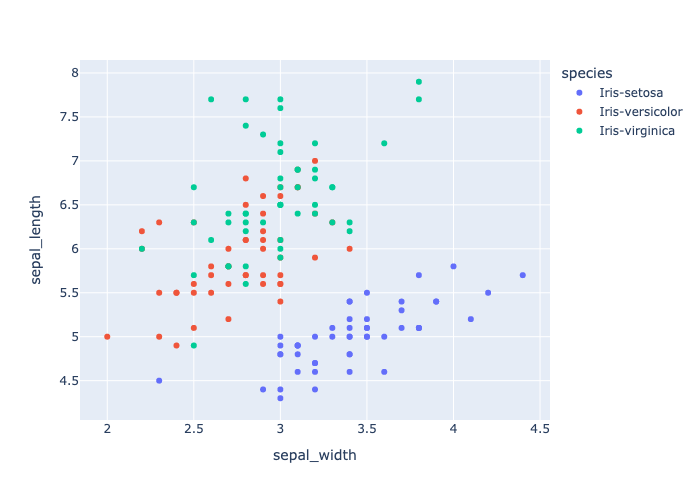

In [10]:
import plotly.express as px
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show('png')

## Modelling

In [11]:
x = df.drop('species', axis=1)
y = df['species']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(x_test)

In [16]:
accuracy_score(y_test, pred)

1.0

In [17]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


In [18]:
from joblib import dump
dump(knn, 'iris_model.joblib')

['iris_model.joblib']